<a href="https://colab.research.google.com/github/aminesalimms-svg/S8-PSCM-22003965/blob/main/Formation_ML_%26_DL_S1_Apprentissage_supervis%C3%A9_(SALIM_Amine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> Formation en Machine Learning et Deep Learning</h1></center>
<center><h3> Atelier1 : comprendre la Classification Supervisée </h3>
</center>

**Objectif** : Former les participants à l'entraînement d'un modèle de classification supervisée en utilisant un dataset simple et visuel. L'atelier inclut l’exploration des données, l'entraînement du modèle et la visualisation des résultats.

Exemple d'application (simple):
Prédiction d'admission à une université en fonction du score d’examen et du score d’entretien.

***Données:***
Nous allons utiliser un modèle de classification supervisée pour prédire si un étudiant sera accepté ou refusé en fonction de deux critères :
*   le score d’examen
*   le score d’entretien
***Algorithme de classification:**
Nous allons utiliser la Régression logistique


<H3>Chargement et Exploration des Données</H2>
Importer les bibliothèques et charger le dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

**Explication des bibliothéques**:
*   NumPy - Manipulation des tableaux numériques
*   Pandas - Manipulation et Analyse de Données
*   Matplotlib - Visualisation des données
*   Seaborn - Visualisation avancée des données
*   Scikit-Learn - Bibliothèque de Machine Learning:

train_test_split: Diviser les données en des données d'entrainement et de validation (test). <br>
LogisticRegression: Modéle de classification Régression logistique<br>
accuracy_score, classification_report, confusion_matrix: les metriques d'évaluation<br>











<H3> Exemple simple </h3>
Prédire l'acceptation ou non d'un candidat à un concours utilisant ses notes d'examen ecrit et son score d'entretien

In [ ]:
import pandas as pd
# Création du dataset fictif
data = {
    "Score_Examen": [50, 55, 60, 65, 70, 75, 80, 85, 88, 90, 92, 95],
    "Score_Entretien": [30, 35, 40, 45, 50, 55, 60, 65, 68, 70, 75, 80],
    "Admission": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 1 = Accepté, 0 = Refusé
}

df = pd.DataFrame(data)

# Affichage des premières lignes
print(df.head())

   Score_Examen  Score_Entretien  Admission
0            50               30          0
1            55               35          0
2            60               40          0
3            65               45          0
4            70               50          0


**Visualiser les données**

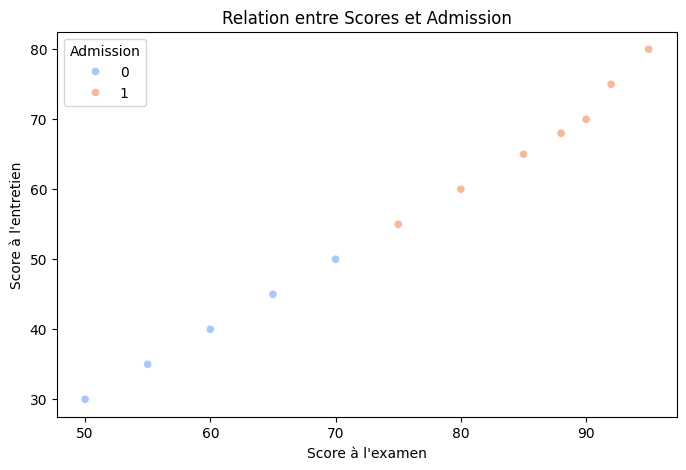

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Re-creation of the specific dataset for this example to ensure the dataframe is correct
data = {
    "Score_Examen": [50, 55, 60, 65, 70, 75, 80, 85, 88, 90, 92, 95],
    "Score_Entretien": [30, 35, 40, 45, 50, 55, 60, 65, 68, 70, 75, 80],
    "Admission": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 1 = Accepté, 0 = Refusé
}
df = pd.DataFrame(data)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Score_Examen"], y=df["Score_Entretien"], hue=df["Admission"], palette="coolwarm")
plt.xlabel("Score à l'examen")
plt.ylabel("Score à l'entretien")
plt.title("Relation entre Scores et Admission")
plt.show()

Chaque point représente un étudiant. Les couleurs montrent s'il a été accepté (1) ou refusé (0). <br>
Le but du modèle est d'apprendre à tracer une frontière de décision qui sépare les étudiants acceptés et refusés.

**Prétraitement des Données et Séparation**

X: Représente la matrice de caractèristiques. Nous avons deux caractèristiques "Score_Examen" et "Score_Entretien".

y: représente les lables. 1 si accepté et 0 si refusé

In [ ]:
X = df[["Score_Examen", "Score_Entretien"]]
y = df["Admission"]

Nous allons diviser les données en 80% pour les données d'entrainement et 20% pour les données de validation ou de test.

X_train et y_train sont les données et labels d'entrainement.

X_text et y_test sont les données et labels de validation.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[["Score_Examen", "Score_Entretien"]]
y = df["Admission"]

# TODO : Séparer X et y en ensembles d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille des données d'entraînement : {X_train.shape}")
print(f"Taille des données de test : {X_test.shape}")

Taille des données d'entraînement : (9, 2)
Taille des données de test : (3, 2)


<h3>Entraînement d'un Modèle de Classification</h3>
Nous allons utiliser un modèle simple pour la classification: Régression Logistique

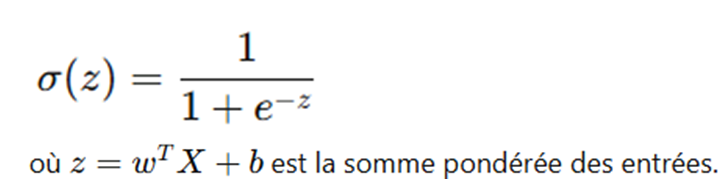

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialisation du modèle
model = LogisticRegression(
        penalty='l2',         # Type de régularisation : 'l1', 'l2', 'elasticnet', 'none'
        max_iter=10,         # Nombre maximum d'itérations pour la convergence
)

In [ ]:
# Entraînement du modèle
# TODO : Entraîner le modèle sur les données d'entraînement et leurs étiquettes
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

Afficher les paramètres estimés (aprés entrainement) de la Régression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

# Re-initialize and fit the model to ensure coef_ and intercept_ are available
model = LogisticRegression(
        penalty='l2',         # Type de régularisation : 'l1', 'l2', 'elasticnet', 'none'
        max_iter=10,         # Nombre maximum d'itérations pour la convergence
)
model.fit(X_train, y_train)

print("W (Coefficients pour RL):", model.coef_)
print("Biais (Intercept pour RL):", model.intercept_)

W (Coefficients pour RL): [[ 6.64726213e-03  1.22496687e-02  4.00643454e-02  2.84254204e-02
   7.15139917e-05  1.37819818e-05 -5.69374426e-05 -2.85148137e-05
   1.34953076e-04  5.54972433e-05  5.13638513e-05  9.84755510e-04
   2.28568727e-04 -1.31079644e-02  6.08368660e-06  8.33204631e-06
   7.77630771e-06  3.50398060e-06  1.62708057e-05  2.82711099e-06
   6.67164437e-03  1.55334834e-02  3.97480305e-02 -3.23136971e-02
   9.36081989e-05 -1.80759304e-06 -9.53565962e-05 -2.17668194e-05
   1.88730009e-04  6.06563899e-05]]
Biais (Intercept pour RL): [0.00088567]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dans cet exemple, nous avons deux caractèrsitiques:

*   0.46333922 est la pondération de la première caractèristique
*   0.46335117 est la pondération de la deixème caractèristique

Pour une nouvelle entrées (x1, x2), nous allons calculer:
*   z= 0.46333922 * x1 + 0.46335117 * x2 + (-57.91800303)

On applique la fonction sigmoid(z)

*   Si, sa valeur est >= 0.5 alors y=1
*   Sinon, y=0

<h3>Evaluation du modèle de classification</h3>
Dans cette étape, nous allons utiliser notre modèle entrainé pour prédire les classes des entrées de validation X_test. Aprés, nous allons comparer les prédiction avec les classes réelles y_test.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Re-create the simple dataset for prediction
data = {
    "Score_Examen": [50, 55, 60, 65, 70, 75, 80, 85, 88, 90, 92, 95],
    "Score_Entretien": [30, 35, 40, 45, 50, 55, 60, 65, 68, 70, 75, 80],
    "Admission": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 1 = Accepté, 0 = Refusé
}
df_simple = pd.DataFrame(data)

X_simple = df_simple[["Score_Examen", "Score_Entretien"]]
y_simple = df_simple["Admission"]

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Re-initialize and fit the model for the simple example
model_simple = LogisticRegression(
        penalty='l2',         # Type de régularisation : 'l1', 'l2', 'elasticnet', 'none'
        max_iter=10,         # Nombre maximum d'itérations pour la convergence
)
model_simple.fit(X_train_simple, y_train_simple)

# TODO : Prédire les classes sur l'ensemble de test du simple exemple
y_pred = model_simple.predict(X_test_simple)

# Assign to y_test for consistency with evaluation cells
y_test = y_test_simple

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score

# Évaluer la précision (Accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Précision) du modèle : {accuracy:.2f}")

Accuracy (Précision) du modèle : 1.00


In [ ]:
from sklearn.metrics import confusion_matrix

print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Matrice de confusion :
 [[1 0]
 [0 2]]


In [ ]:
from sklearn.metrics import classification_report

print("Rapport de classification :\n", classification_report(y_test, y_pred))

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<H2> Exemple avancé: "Breast Cancer Classification" utilisant des caractéristiques extraites</h2>

Le dataset Breast Cancer Wisconsin (Diagnostic) est un dataset prédéfini dans Scikit-learn qui contient des informations médicales permettant de classer une tumeur comme bénigne ou maligne.


**Desciption du dataset Breast Cancer:**

*   Nombre d’échantillons : 569
*   Nombre de caractéristiques : 30 (extraites de la tumeur)

Nombre de classes : 2
*   0 : Maligne (danger)
*   1 : Bénigne (non dangereux)

**Objectif** : Prédire si une tumeur est bénigne (0) ou maligne (1) à partir de 30 caractéristiques extraites d'images de cellules du sein.


In [ ]:
# Charger le dataset Breast Cancer
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# Convertir en DataFrame Pandas
# cancer.data : LEs données
# cancer.feature_names : Les noms des caractèrsitiques
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

#cancer.target : étiquettes (labels)
df['target'] = cancer.target  # Ajout de la colonne cible

# Affichage des 5 premières lignes
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**Visualiser la distribution des classes**

Les classes:

*   0 = Tumeur maligne
*   1 = Tumeur bénigne


/tmp/ipython-input-168/3703451547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="coolwarm")


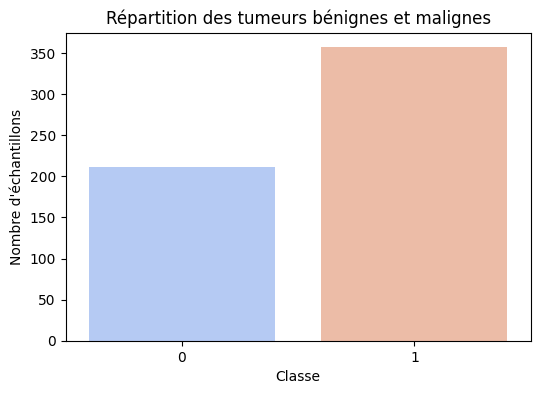

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["target"], palette="coolwarm")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.title("Répartition des tumeurs bénignes et malignes")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Matrice de caractéristiques et étiquettes (labels
X = df.drop(columns=["target"])  # Features
y = df["target"]  # labels

In [ ]:
# Séparer en train et test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Taille des données d\'entraînement : {X_train.shape}')
print(f'Taille des données de test : {X_test.shape}')

Taille des données d'entraînement : (455, 30)
Taille des données de test : (114, 30)


<H3>Entraînement et Évaluation des Modèles</H3>
Nous allons tester plusieurs algorithmes de classification supervisée sur le dataset Iris, en comparant leurs performances.

Les algorithmes à tester :

1.   Régression Logistique
2.   Support Vector Machine (SVM) avec différents kernels (linear, rbf)
3.   Decision Tree (DT)
4.   K-Nearest Neighbors (KNN)
5.   Random Forest (RF)

Nous allons entraîner chaque modèle, prédire les classes et évaluer leurs performances.

<h4>1- Régression Logistique</h4>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report
from sklearn.preprocessing import StandardScaler # Import StandardScaler for data scaling

# Ensure df is available by reloading if necessary
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Matrice de caractéristiques et étiquettes (labels)
X = df.drop(columns=["target"])  # Features
y = df["target"]  # labels

# Séparer en train et test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_lr = LogisticRegression(
        penalty='l2',         # Type de régularisation : 'l1', 'l2', 'elasticnet', 'none'
        max_iter=1000,         # Nombre maximum d'itérations pour la convergence, augmenté pour la convergence
)
# Train the model with scaled data
model_lr.fit(X_train_scaled, y_train)
# Make predictions with scaled data
y_pred_lr = model_lr.predict(X_test_scaled)
print("Régression Logistique - Accuracy :", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Régression Logistique - Accuracy : 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<h4>2- Support Vector Machine (SVM)</h4>

**SVM avec Kernel Linéaire**


In [ ]:
from sklearn.svm import SVC
#gridSearch
model_svm_linear = SVC(
    kernel='linear',
    C=1.0,
    gamma='scale',
    max_iter=-1
)
model_svm_linear.fit(X_train, y_train)
y_pred_svm_linear = model_svm_linear.predict(X_test)
print("SVM (Linear Kernel) - Accuracy :", accuracy_score(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))

SVM (Linear Kernel) - Accuracy : 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**SVM avec Kernel RBF (Radial Basis Function)**

In [ ]:
from sklearn.svm import SVC

model_svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', max_iter=-1)
model_svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = model_svm_rbf.predict(X_test)
print("SVM (RBF Kernel) - Accuracy :", accuracy_score(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))

SVM (RBF Kernel) - Accuracy : 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



<h4>3- Decision Tree (DT)</h4>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(
    criterion='gini',       # Fonction d’évaluation : 'gini' ou 'entropy'
    splitter='best',        # 'best' = meilleur split, 'random' = split aléatoire

)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree - Accuracy :", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree - Accuracy : 0.9385964912280702
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



<h4>4- K-Nearest Neighbors (KNN)</h4>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski'
)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("KNN (k=5) - Accuracy :", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN (k=5) - Accuracy : 0.956140350877193
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



<h4>5- Random Forest (RF)</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=100,       # Nombre d'arbres dans la forêt
    criterion='gini',       # Fonction d’évaluation : 'gini' ou 'entropy'
    random_state=42,        # Fixe la graine pour la reproductibilité
    )
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest - Accuracy :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy : 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<H4> Comparaison des Modèles</h4>

Comparer la précision de chaque modèle

                  Modèle  Accuracy
0  Régression Logistique  0.973684
5          Random Forest  0.964912
1           SVM (Linear)  0.956140
4              KNN (k=5)  0.956140
2              SVM (RBF)  0.947368
3          Decision Tree  0.929825


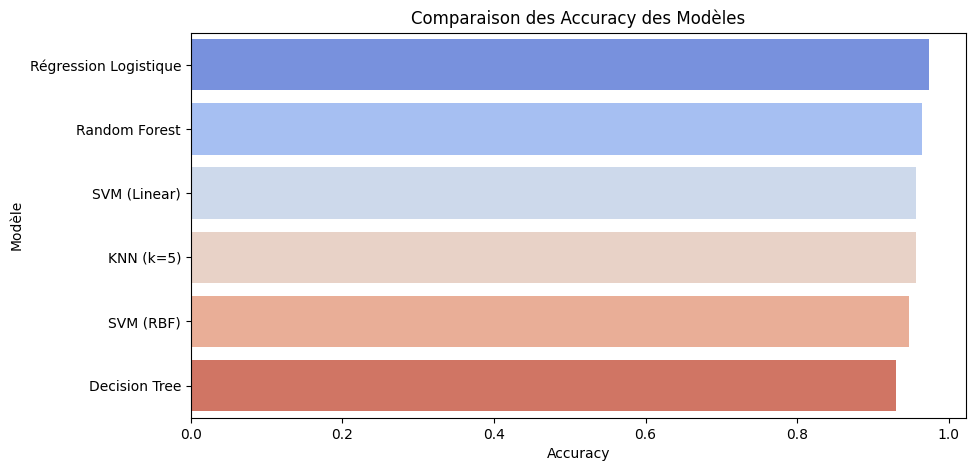

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Import all classifier classes again to ensure they are available in this cell
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Re-instantiate and train all models to make this cell self-contained for comparison

# 1. Logistic Regression (using scaled data)
model_lr = LogisticRegression(penalty='l2', max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# 2. SVM (Linear Kernel) (using unscaled data)
model_svm_linear = SVC(kernel='linear', C=1.0, gamma='scale', max_iter=-1)
model_svm_linear.fit(X_train, y_train)

# 3. SVM (RBF Kernel) (using unscaled data)
model_svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', max_iter=-1)
model_svm_rbf.fit(X_train, y_train)

# 4. Decision Tree (using unscaled data)
model_dt = DecisionTreeClassifier(criterion='gini', splitter='best')
model_dt.fit(X_train, y_train)

# 5. K-Nearest Neighbors (KNN) (using unscaled data)
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
model_knn.fit(X_train, y_train)

# 6. Random Forest (using unscaled data)
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
model_rf.fit(X_train, y_train)


models = {
    "Régression Logistique": model_lr,
    "SVM (Linear)": model_svm_linear,
    "SVM (RBF)": model_svm_rbf,
    "Decision Tree": model_dt,
    "KNN (k=5)": model_knn,
    "Random Forest": model_rf
}

# Prepare X_test for each model based on whether it was scaled during training
accuracies = {}
for name, model in models.items():
    if name == "Régression Logistique":
        y_pred = model.predict(X_test_scaled) # Use scaled data for LR
    else:
        # For SVM, DT, KNN, RF, we are using the unscaled X_test as they were trained with it.
        # If you scaled data for these models in earlier cells, ensure X_test_scaled is used here too.
        y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Afficher les résultats sous forme de tableau
df_results = pd.DataFrame(list(accuracies.items()), columns=["Modèle", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results)

# Visualisation des résultats
plt.figure(figsize=(10,5))
sns.barplot(x="Accuracy", y="Modèle", hue="Modèle", data=df_results, palette="coolwarm", legend=False)
plt.title("Comparaison des Accuracy des Modèles")
plt.show()
